##Homework Week 6
-

In [19]:
#import libs
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sp
from scipy import stats
from scipy.stats import norm, poisson
from statsmodels.stats.proportion import proportion_confint


#import files
!wget https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week6/week6.md
!wget https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week6/inputdata.txt
!wget https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week6/diskmasses.txt

--2023-10-08 18:35:32--  https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week6/week6.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3119 (3.0K) [text/plain]
Saving to: ‘week6.md.3’

week6.md.3          100%[===================>]   3.05K  --.-KB/s    in 0s      

2023-10-08 18:35:32 (29.6 MB/s) - ‘week6.md.3’ saved [3119/3119]

--2023-10-08 18:35:32--  https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week6/inputdata.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 

#Problem 1:
Given a function, find the roots using LM algo, verify, will add some plots for visual cues
 1. Find roots using Levenberg-Marquardt algorithm, then verify.

the root using the levenberg-marquardt algorithm is: 
 [0.40872172]
f(x) at the root is: 
 [-1.66533454e-16]
rounded the function evaluated at root is
: 0.0


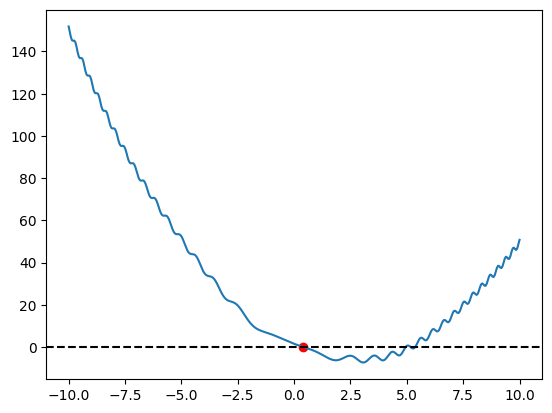

In [20]:
#create function given function def
f = lambda x: x**2 - 5*x + 1.5*np.cos(x**2) + np.sin(x)

#find roots using levenberg-marquardt algo
results = optimize.root(f, 0, method='lm')
print(f'the root using the levenberg-marquardt algorithm is: \n {results.x}')

# checking f(x) at root
print(f'f(x) at the root is: \n {f(results.x)}')
print(f'rounded the function evaluated at root is\n: {round(abs(f(results.x))[0], 1)}')

# plot
x_values = np.linspace(-10, 10, 400)
plt.plot(x_values, f(x_values))
plt.scatter(results.x, f(results.x), color='red')
plt.axhline(0, color='black', linestyle='--')
plt.savefig('levenberg-marquardt.png')
plt.show()


#Problem 2: Newton-Raphson
-
 1. Given a function, compute values at integers
 2. Make guess for integer closest to root of the function
 3. use def to estimate NR method,  (use 2 functions)
 4. Compute real root est from NR using starting integer value
 5. Verify solution
 6. How close?

The values of the function at the integer values are:

func(1) = -4
func(2) = 15
func(3) = 64
func(4) = 155
func(5) = 300
first NR update from x_0 = 1 is x1 = 1.5
Real root from scipy.optimize.newton: 1.3507810593582121
func at real root is: 0.0
Difference between first NR update and real root: 0.14921894064178787


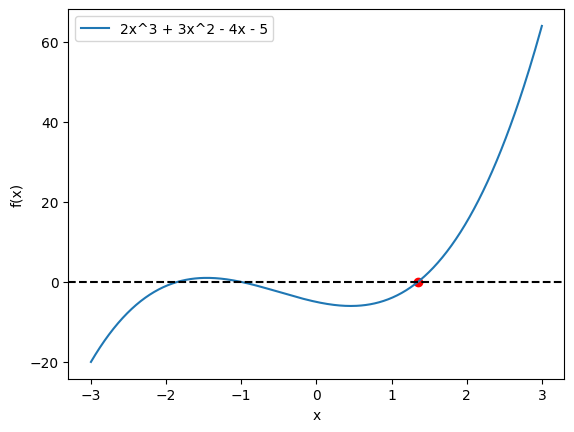

In [21]:
#define function and d/dx, will use sympy for generalization although trivial d/dx in this case

#sympy def for symbol to differentiate
x = sp.Symbol('x')

#function def for sympy
func_sympy = 2*x**3 + 3*x**2 - 4*x - 5

#differentiate with respect to x
funcd_sympy = sp.diff(func_sympy, x)

#now lambda function conversion (wish they played nicer lol)
func = lambda x: 2*x**3 + 3*x**2 - 4*x - 5
funcd = sp.lambdify(x, funcd_sympy)


#compute values at integers 1-5
print('The values of the function at the integer values are:\n')
for i in range(1,6):
  print(f'func({i}) = {func(i)}')

#guess is 1 as func(1) is closest to zero compared to computed values
guess = 1

#first NR update
x1 = guess - func(guess)/funcd(guess)
print(f'first NR update from x_0 = {guess} is x1 = {x1}')

#real root using optimize.newton
root = optimize.newton(func, guess, fprime=funcd)
print(f'Real root from scipy.optimize.newton: {root}')

#verify the real root
print(f'func at real root is: {func(root)}')

#difference in the first iteration?
print(f'Difference between first NR update and real root: {abs(root - x1)}')

#lets plot to visually check :)

#x array for plt
x_values = np.linspace(-3, 3, 400)

#y coorsponding for realistic y values
y_values = [func(i) for i in x_values]

#plt routine
plt.plot(x_values, y_values, label='2x^3 + 3x^2 - 4x - 5')

#call out real root
plt.scatter(root, func(root), color='red')

#y=0 line
plt.axhline(0, color='black', linestyle='--')

#labels/ledgend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.savefig('Newton-Raphson.png')
plt.show()

#Problem 3
-
1. read in data using np.loadtxt
2. visualize
3. fit data with curve_fit, report values for two coefficients
4. Compare your solution by plotting data with functional fit
5. Explain why it may not look perfect.


In [22]:
#assign to data via np.loadtxt
data = np.loadtxt('inputdata.txt')

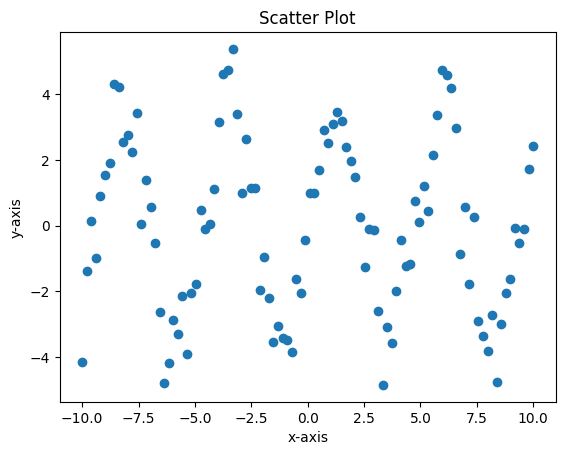

In [23]:
#visulize the data:

#slice for columns
x_values = data[:, 0]
y_values = data[:, 1]

#plot routine
plt.scatter(x_values, y_values)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter Plot')
plt.show()


#This looks like a Sine Wave or cylical funciton.

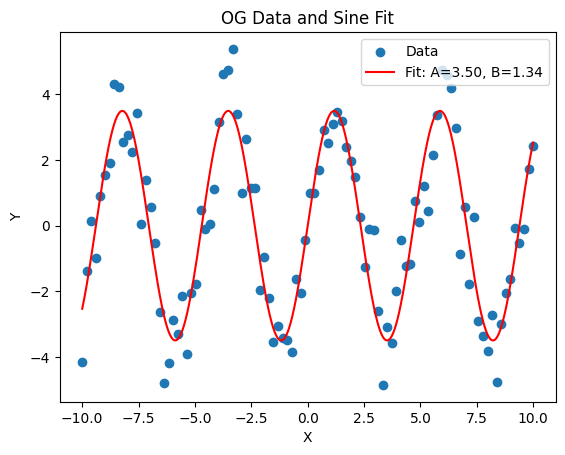

the coefficients of the fit are (A, B) : 
 [3.5  1.34]
r squared value is : 0.87


In [24]:
from scipy.optimize import curve_fit

#define function structure
def sin_function(x, A, B):
  return A * np.sin(B * x)

#use curve_fit to find optimal params, ignore second passed argument
params, _ = curve_fit(sin_function, x_values, y_values)

#return coefficients
A, B = params


#generate data points for fit
x_fit = np.linspace(min(x_values), max(x_values),1000)
y_fit = sin_function(x_fit, A, B)

#plt OG and fit
plt.scatter(x_values, y_values, label='Data')
plt.plot(x_fit, y_fit, label=f'Fit: A={A:.2f}, B={B:.2f}', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('OG Data and Sine Fit')
plt.savefig('OG Data + Sine fit.png')
plt.show()


rounded_params = np.round(params,2)
print('the coefficients of the fit are (A, B) : \n', rounded_params)

#lets do r**2 to find how close of fit
#find residuals, y values - passed curve w/ x values
residuals = y_values - sin_function(x_values, A, B)

#sum of squares for total
ss_tot = np.sum((y_values - np.mean(y_values)) ** 2)

#residual totals
ss_res = np.sum(residuals ** 2)

#r squared
r_squared = 1 - (ss_res / ss_tot)
print(f'r squared value is : {r_squared:.2f}')


#Why might it not be perfect?
 1. The data could have noise
 2. Sine could be to simple for whatever this data represents
 3. Dapening Factors in the actual pattern
 4. Could enter optional arguments for curve fit like intial guess or bounds
 5. .87 R^2 isn't too bad!

#Problem 4
-
1. read in diskmasses.txt, I used wget earlier in the script
2. Use Scipy: .mean,.stats.ndimage to compute stats on the last column of dataset
3. calculate various percentiles of the dataset

In [25]:
#read in file, previoulsy brought in by wget, return only the last column
import scipy
disk_masses = np.loadtxt('diskmasses.txt', usecols=(-1,))


#compute the mean
mean_mass = scipy.mean(disk_masses)

#compute median
median_mass = scipy.ndimage.median(disk_masses)

#compute variance
var_mass = scipy.stats.tvar(disk_masses)

#calculate percentile
percentile_25th = stats.scoreatpercentile(disk_masses, 25)
percentile_75th = stats.scoreatpercentile(disk_masses, 75)


print('the mean mass is : ', mean_mass)
print('the median mass is : ', median_mass)
print('the variance of the log(disk_mass) is : ', var_mass)
print('the 25th percentile is : ', percentile_25th)
print('the 75th percentile is : ', percentile_75th)



the mean mass is :  -2.312881042553191
the median mass is :  -2.30103
the variance of the log(disk_mass) is :  0.5195153900283208
the 25th percentile is :  -3.0
the 75th percentile is :  -1.69897


<ipython-input-25-41c25180233f>:7: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_mass = scipy.mean(disk_masses)


# Problem 5
 1. Python for Binomial and Poission given values
 2. Inteperation



In [26]:
#initilize data
n = 25 #total stars
k = 5 #observations
p = k/n #success rate

"""you asked in your email for us
: I would try to do the computations for binomial statistics with different algorithms
I'll now use scipy for binomial, statsmodel-wilson (statsmodel is awesome btw), and
then scipy for poisson and print the results."""


#binomial with norm.ppf (scipy)
#will zet Z using Quartile function, inverse Cumulative Distro Function.
#ppf reterining z value, 68.5% confidence interval for each tail
z = norm.ppf(1 - 0.318/2)
delta = z * np.sqrt(p*(1-p)/n)
lower_binomial, upper_binomial = p- delta, p+ delta


#binomial using wilson score
lower_wilson, upper_wilson = proportion_confint(count=k, nobs=n, alpha=0.318, method='wilson')

#poisson CI
lamda_ = k
lower_poisson, upper_poisson = poisson.interval(0.682, lambda_)

print('Wilson CI:', (lower_wilson, upper_wilson))
print('Binomial CI:', (lower_binomial, upper_binomial)) #using norm.ppf in scipy
print('Poisson CI:', (lower_poisson, upper_poisson))




Wilson CI: (0.13232724553811998, 0.29068653234944164)
Binomial CI: (0.12011389835074728, 0.27988610164925276)
Poisson CI: (7.0, 13.0)




I'm a little confused about this one. I will go on a diatribe about my thoughts and hope for full credit.

After evaluating the statements as a literal interpretation:
- There were debris disks around 5/25 stars or 20%
- There is an error rate of +/- 9.8%
- The 68.2% confidence interval could be as low/high as 20%.
- The upper limit of their interval is 20% + 9.8% which is 29.8%, comparable to 30% of other studies.

## Thoughts expanding on Binomial vs. Poisson: What should be used here?

### Binomial:
1. Used with fixed outcomes like a star has debris disk or doesn't.
2. If this were only one star, this would be a special case of binomial, Bernoulli where n=1.

### Poisson Distribution:
1. Measure the probability of a number of events in a specified period.
2. Essentially a binomial distribution taken to an infinite limit with a constant expected success rate.
3. Poisson's confidence intervals are *symmetric* around the mean. But they are invalid if the sample size is not large.

## Comparison between Wilson CI, Binomial CI, and Poisson CI
1. We can see that the Wilson Binomial/ppf binomial are very close to each other.
2. When we compare this to the Poisson CI we are order of magnitude off. Again Poission is considered a good approx when n is large and p is small. this clearly isn't the case here.

## Conclusion:
The best fit in this scenario would be Binomial intervals. Given the context, the Poisson distribution has clear parameters for when it should not be used. This problem has n=25 stars which is too few to consider valid for Poisson.The binomial distbution provides a more accurate representation of the confidence intervals.


#Doing this to visulize CI/Poission/Binomial

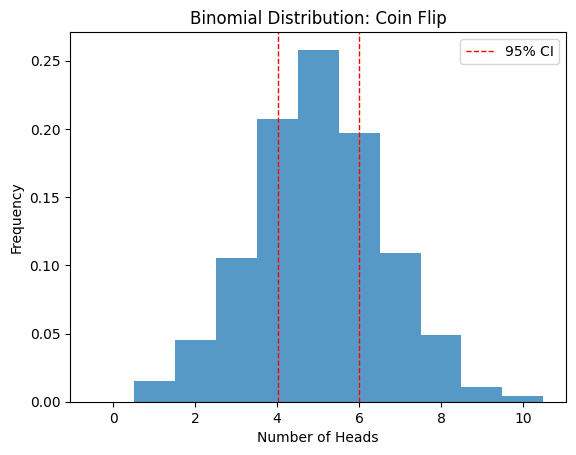

the standard error for my example is :  0.5006995106848019
the mean of my example is :  5.014
therefore my my CI is:  [4.032628959057789, 5.995371040942212]
difference from lower bound: 0.9813710409422116 , difference from upper bound: 0.9813710409422116
therfore: symmetrical


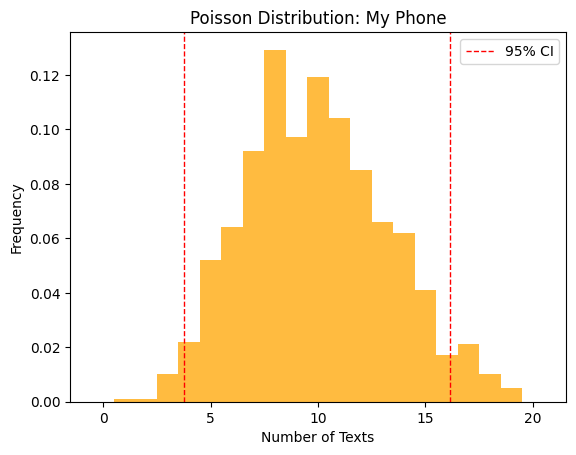

the standard error for my example is :  3.1561051946980476
the mean of my example is :  9.961
therefore my my CI is:  [3.775033818391827, 16.146966181608175]
therfore: symmetrical


In [27]:
#just for fun, visualize where Binomial/Possion would go well

#flip a coin where p = 1/2 100 times, clearly a good case for binomial


#set n and p
n, p = 10, 0.5
#np binomial sample
binomial_data = np.random.binomial(n, p, 1000)

#will use z value of 1.96 for z, @ 95% confidence. 1.96 -/+ stdev.p of mean

#ci for binomila
binomial_mean = np.mean(binomial_data)
binomial_se = np.sqrt(binomial_mean * (1 - p) / n)
binomial_ci = [binomial_mean - 1.96 * binomial_se, binomial_mean + 1.96 * binomial_se]
difference_lower = binomial_mean - binomial_ci[0]
difference_upper = binomial_ci[1] - binomial_mean

#plot
plt.hist(binomial_data, bins=np.arange(-0.5, 11.5, 1), density=True, alpha=0.75)
plt.axvline(binomial_ci[0], color='red', linestyle='dashed', linewidth=1, label='95% CI')
plt.axvline(binomial_ci[1], color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.title('Binomial Distribution: Coin Flip')
plt.legend()
plt.savefig('binomial of coin flip.png')
plt.show()

#print
print('the standard error for my example is : ', binomial_se)
print('the mean of my example is : ', binomial_mean)
print('therefore my my CI is: ', binomial_ci)
print('difference from lower bound:', difference_lower, ', difference from upper bound:', difference_upper)
if round(difference_lower, 3) == round(difference_upper, 3):
    print('therfore: symmetrical')
else:
    print('difference from lower bound:', difference_lower, ', difference from upper bound:', difference_upper)



#poisson distribution
#my phone gets 10 texts per hour (jk i have no friends), simulated for 1000 hours.

lambda_ = 10
poisson_data = np.random.poisson(lambda_, 1000)

poisson_mean = np.mean(poisson_data)
poisson_se = np.sqrt(poisson_mean)
poisson_ci = [poisson_mean - 1.96 * poisson_se, poisson_mean + 1.96 * poisson_se]
difference_lower = poisson_mean - poisson_ci[0]
difference_upper = poisson_ci[1] - poisson_mean

#plt both CI and data
plt.hist(poisson_data, bins=np.arange(-0.5, 21.5, 1), density=True, alpha=0.75, color='orange')
plt.axvline(poisson_ci[0], color='red', linestyle='dashed', linewidth=1, label='95% CI')
plt.axvline(poisson_ci[1], color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Number of Texts')
plt.ylabel('Frequency')
plt.title('Poisson Distribution: My Phone')
plt.legend()
plt.savefig('no_one_texts_me.png')
plt.show()

#print
print('the standard error for my example is : ', poisson_se)
print('the mean of my example is : ', poisson_mean)
print('therefore my my CI is: ', poisson_ci)
if round(difference_lower, 3) == round(difference_upper, 3):
    print('therfore: symmetrical')
else:
    print('difference from lower bound:', difference_lower, ', difference from upper bound:', difference_upper)
